In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from tqdm import tqdm
import shutil

print(os.listdir())
import matplotlib.pyplot as plt

['graph_example275.jpg', 'graph_example300.jpg', 'graph_example100.jpg', 'social_graph_indicator.txt', '.DS_Store', 'social_A.txt', 'social_graph_labels.txt', 'graph_example0.jpg', 'graph_example175.jpg', 'social_to_adjacency.ipynb', 'graph_example375.jpg', 'graph_example200.jpg', 'graph_example75.jpg', 'slashdot.txt', 'Epinions.txt', 'social_node_labels.txt', 'large_twitch_edges.csv', 'graph_example50.jpg', 'graph_example225.jpg', 'graph_example350.jpg', 'social.txt', 'graph_example150.jpg', 'artist_edges.csv', '.ipynb_checkpoints', 'twitter.txt', 'graph_example125.jpg', 'graph_example325.jpg', 'sampling_test.ipynb', 'graph_example250.jpg', 'graph_example25.jpg']


In [2]:
social_data = pd.read_csv("slashdot.txt", delimiter="\t")
print(repr(social_data))
# np.savetxt(r'social_A.txt', social_data.values, fmt='%d', delimiter=",\t")
print(social_data.shape)

            0    0.1
0           0      1
1           0      2
2           0      3
3           0      4
4           0      5
...       ...    ...
948458  82165  82165
948459  82165  82166
948460  82166  82131
948461  82166  82165
948462  82166  82166

[948463 rows x 2 columns]
(948463, 2)


In [12]:
G = nx.Graph()
dG = nx.DiGraph()
for i in tqdm(range(social_data.shape[0])):
    if social_data.iloc[i, 0] != social_data.iloc[i, 1]:
        G.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])
        dG.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])
G = nx.convert_node_labels_to_integers(G)
dG = nx.convert_node_labels_to_integers(dG)


# for i in tqdm(range(social_data.shape[0])):
#     if social_data.iloc[i, 0] != social_data.iloc[i, 1]:
#         dG.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])


print(G)

100%|████████████████████████████████| 948463/948463 [00:44<00:00, 21123.44it/s]


Graph with 82168 nodes and 504230 edges


(948463, 2)
82168
200
40000


  0%|                                                   | 0/200 [00:00<?, ?it/s]

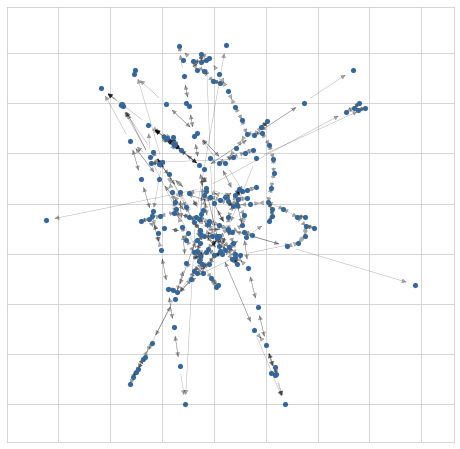

 24%|██████████                                | 48/200 [00:01<00:03, 50.54it/s]

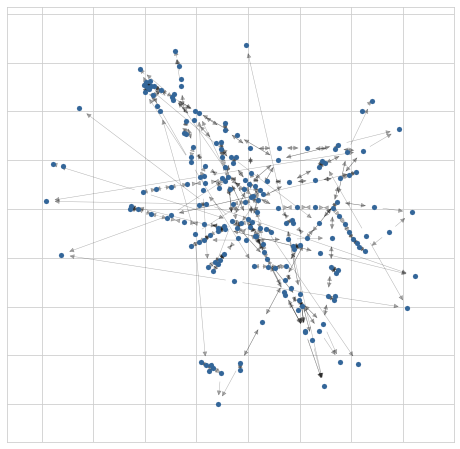

 48%|████████████████████▏                     | 96/200 [00:03<00:02, 49.76it/s]

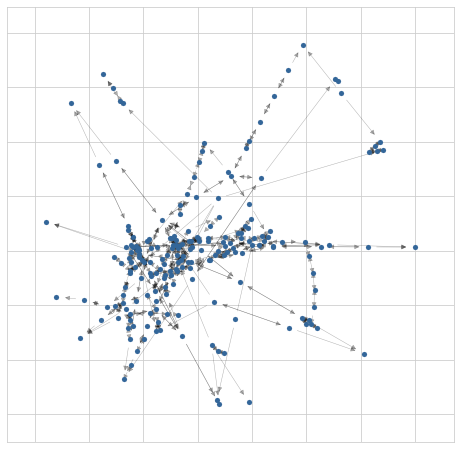

 71%|█████████████████████████████            | 142/200 [00:05<00:01, 47.72it/s]

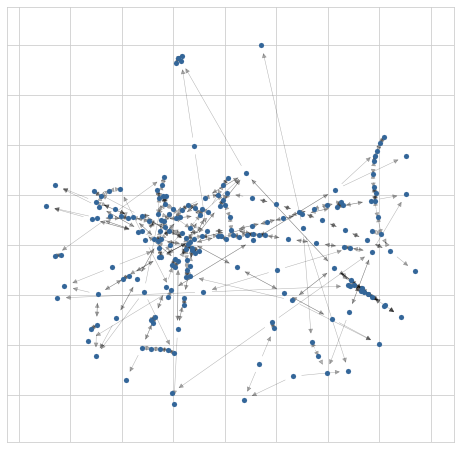

100%|█████████████████████████████████████████| 200/200 [00:06<00:00, 28.60it/s]


(89251, 2)
(40000,)
graph_example275.jpg
graph_example300.jpg
graph_example100.jpg
social_graph_indicator.txt
.DS_Store
social_A.txt
social_graph_labels.txt
graph_example0.jpg
graph_example175.jpg
social_to_adjacency.ipynb
graph_example375.jpg
graph_example200.jpg
graph_example75.jpg
slashdot.txt
Epinions.txt
social_node_labels.txt
large_twitch_edges.csv
graph_example50.jpg
graph_example225.jpg
graph_example350.jpg
social.txt
graph_example150.jpg
artist_edges.csv
.ipynb_checkpoints
twitter.txt
graph_example125.jpg
graph_example325.jpg
sampling_test.ipynb
graph_example250.jpg
graph_example25.jpg
.DS_Store
FIRSTMM_DB
SOCIAL
DD
(40000,)
(40000,)


In [15]:
from littleballoffur import ForestFireSampler, MetropolisHastingsRandomWalkSampler, RandomWalkSampler, DiffusionSampler
print(social_data.shape)
n_nodes = np.unique(social_data.values).shape[0]
print(n_nodes)
n_graphs = 200

graph_ind_array = np.zeros(n_nodes)
n_per_graph = 200#int(n_nodes / n_graphs)

print(n_per_graph)

total_n = n_per_graph * n_graphs

print(total_n)
graph_ind_array = np.zeros(total_n)


#number_of_nodes = int(0.5*graph.number_of_nodes())


for i in tqdm(range(n_graphs)):
    
    offset_index = i * n_per_graph
    sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = n_per_graph,# np.random.randint(200, n_per_graph),
                               seed = np.random.randint(1, 1e6))
    new_graph = sampler.sample(G)
    
    sampled_nodes = list(new_graph.nodes())
    
    new_graph = nx.DiGraph(dG.subgraph(sampled_nodes))
    
    # print(len(list(new_graph.nodes())))
    
    new_graph = nx.convert_node_labels_to_integers(new_graph, first_label=offset_index)
    
    graph_ind_array[offset_index:(i+1) * n_per_graph] = i+1
    
    
    if i ==0:
        graph_adj = np.array(new_graph.edges())
    else:
        graph_adj = np.append(graph_adj, np.array(new_graph.edges()), axis = 0)
    
    if i % 50 == 0:
        plt.figure(figsize = (8,8))
        
        pos = nx.spring_layout(
          new_graph, k=0.1, iterations=100)
        
        
        nx.draw_networkx_nodes(
          new_graph,
          pos,
          node_size=25,
          node_color='#336699',
          alpha=1,
          linewidths=0.2)#,
          # font_size=1.5)
        nx.draw_networkx_edges(new_graph, pos, alpha=0.3, width=0.5)

        plt.savefig(f"graph_example{i}.jpg")
        plt.show()

print(graph_adj.shape)
print(graph_ind_array.shape)

total_n = graph_ind_array.shape[0]


for file in os.listdir():
    print(file)
    if "GRAN" in file:
        print(file)

data_dir =        "/Users/alexdavies/Documents/Year_1/Project/D-GRAN/data/"

for file in os.listdir(data_dir):
    print(file)
    if "GRAN" in file:
        shutil.rmtree(f"{data_dir}{file}")

np.savetxt(f'{data_dir}SOCIAL/social_A.txt', graph_adj, fmt='%d', delimiter=",\t")
np.savetxt(f'{data_dir}SOCIAL/social_graph_indicator.txt',graph_ind_array, fmt="%d")

np.savetxt(f'{data_dir}SOCIAL/social_node_labels.txt', np.arange(1, total_n+1), fmt = "%d")
print(np.arange(1, total_n+1).shape)

np.savetxt(f'{data_dir}SOCIAL/social_graph_labels.txt', np.ones(total_n), fmt = "%d")
print(np.ones(total_n).shape)

In [5]:
# print(social_data.shape)
# n_nodes = np.unique(social_data.values).shape[0]
# print(n_nodes)
# n_graphs = 100

# graph_ind_array = np.zeros(n_nodes)
# n_per_graph = int(n_nodes / n_graphs)

# print(n_per_graph)

# G_ids = []

# for i in range(n_graphs):
    
#     G2 = nx.Graph()

#     for node in G.nodes():
        
#         neighbours = list(G.neighbors(node))


In [6]:


# # for i in range(n_graphs):
    
# #     graph_ind_array[i*n_per_graph : (i+1)*n_per_graph] = i+1
    
# #     if i == n_graphs - 1:
# #         graph_ind_array[(i+1)*n_per_graph:] = i+1

# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")
# print(graph_ind_array.shape)

In [7]:
# np.savetxt(r'social_node_labels.txt', np.arange(1, n_nodes+1), fmt = "%d")
# print(np.arange(1, n_nodes+1).shape)

In [8]:
# np.savetxt(r'social_graph_labels.txt', np.ones(n_nodes), fmt = "%d")
# print(np.ones(n_nodes).shape)

In [9]:
# adj = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_A.txt", delimiter = ",|\n")
# adj.shape

In [10]:
# g_ind = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_graph_indicator.txt", delimiter = ",|\n")
# g_ind.shape

In [11]:
# n_lab = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_node_labels.txt", delimiter = ",|\n")
# n_lab.shape